### 01h_standalone_konigsberg_bridge_example — A Classic Graph Theory Problem

### What this step does
This notebook is a standalone example demonstrating how a famous historical problem, the **Seven Bridges of Königsberg**, can be modeled and solved using graph theory with NetworkX. It abstracts the landmasses as nodes and the bridges as edges, then uses Eulerian path theory to determine if it's possible to traverse every bridge exactly once.

### Why this is useful
- Serves as a classic, intuitive introduction to graph theory concepts.
- Illustrates the power of abstracting real-world problems into graph structures.
- Demonstrates the use of a `MultiGraph` to model parallel edges (multiple bridges between the same landmasses).
- Introduces the concept of an **Eulerian Path** and how to check for one in NetworkX.

### Inputs
- None. This notebook is self-contained and generates its own graph structure.

### Outputs
- `outputs/01h_konigsberg_bridge/01h_konigsberg_bridge_visualisation.png`
- `outputs/01h_konigsberg_bridge/01h_analysis_summary.json`

### Key operations
- Model the Königsberg bridge problem using a `networkx.MultiGraph`.
- Calculate the degree of each node (landmass).
- Use `networkx.has_eulerian_path` to programmatically solve the problem.
- Explain the result based on the number of odd-degree nodes.
- Create a clear, labeled visualisation of the graph that represents the problem's geography.

In [1]:
# --- Step 0: Imports and Configuration ---
# 203 # This cell imports the necessary libraries for graph creation, analysis,
# 203 # and visualisation. It follows the established pattern of using a
# 203 # dataclass for configuration to ensure that all file paths are managed
# 203 # cleanly and relative to the project structure.

from __future__ import annotations

import json
from dataclasses import dataclass
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

@dataclass(frozen=True)
class Config:
    """Configuration object for file paths and parameters."""
    output_dir: Path
    viz_file: Path
    summary_file: Path


def setup_config() -> Config:
    """Initialises configuration and creates necessary directories."""
    root_dir = Path(".")
    output_dir = root_dir / "outputs" / "01h_konigsberg_bridge"
    output_dir.mkdir(parents=True, exist_ok=True)

    return Config(
        output_dir=output_dir,
        viz_file=output_dir / "01h_konigsberg_bridge_visualisation.png",
        summary_file=output_dir / "01h_analysis_summary.json",
    )

cfg = setup_config()

print("--- Configuration Initialised ---")
print(f"Outputs will be saved to: {cfg.output_dir}")

--- Configuration Initialised ---
Outputs will be saved to: outputs/01h_konigsberg_bridge


In [2]:
# --- Step 1: Define and Build the Königsberg Graph ---
# 203 # This cell defines a single-purpose function to construct the graph.
# 203 # The problem involves multiple bridges connecting the same two landmasses,
# 203 # so a `MultiGraph` is the correct data structure to allow for these
# 203 # parallel edges. Nodes represent landmasses, and edges represent bridges.

def build_konigsberg_graph() -> nx.MultiGraph:
    """Creates the NetworkX MultiGraph representing the Königsberg bridges."""
    G = nx.MultiGraph()

    # 203 # Define the four landmasses as nodes.
    nodes = {
        "A": "North Bank",
        "B": "South Bank",
        "C": "Kneiphof Island",
        "D": "Lomse Island",
    }
    for node, name in nodes.items():
        G.add_node(node, name=name)

    # 203 # Define the seven bridges as edges between the landmasses.
    edges = [
        ("A", "C"), ("A", "C"),  # Two bridges between North Bank and Kneiphof Island
        ("A", "D"),             # One bridge between North Bank and Lomse Island
        ("B", "C"), ("B", "C"),  # Two bridges between South Bank and Kneiphof Island
        ("B", "D"),             # One bridge between South Bank and Lomse Island
        ("C", "D"),             # One bridge between the two islands
    ]
    G.add_edges_from(edges)

    print("Königsberg bridge problem modeled as a NetworkX MultiGraph.")
    print(f"- Nodes (Landmasses): {G.number_of_nodes()}")
    print(f"- Edges (Bridges): {G.number_of_edges()}")
    return G

# 203 # Execute the graph building function.
G_konigsberg = build_konigsberg_graph()

Königsberg bridge problem modeled as a NetworkX MultiGraph.
- Nodes (Landmasses): 4
- Edges (Bridges): 7


In [3]:
# --- Step 2: Analyze the Graph for an Eulerian Path ---
# 203 # This cell determines if an Eulerian path exists. According to Euler's theorem,
# 203 # a connected graph has an Eulerian path if and only if it has exactly zero or
# 203 # two nodes with an odd degree. We will calculate the degree of each node
# 203 # and then use the built-in NetworkX function to verify the result.

def analyze_eulerian_path(G: nx.MultiGraph) -> dict:
    """Analyzes node degrees to check for an Eulerian path."""
    # 203 # Calculate the degree (number of bridges) for each landmass.
    degrees = {node: G.degree(node) for node, data in G.nodes(data=True)}
    
    # 203 # Count how many nodes have an odd degree.
    odd_degree_nodes = [node for node, degree in degrees.items() if degree % 2 != 0]
    num_odd_degree = len(odd_degree_nodes)

    # 203 # Use NetworkX's built-in function to check for an Eulerian path.
    has_path = nx.has_eulerian_path(G)

    # 203 # Compile the results into a dictionary for analysis and export.
    analysis = {
        "node_degrees": degrees,
        "odd_degree_node_count": num_odd_degree,
        "odd_degree_nodes": odd_degree_nodes,
        "has_eulerian_path": has_path,
        "explanation": (
            "A path is possible (0 or 2 odd-degree nodes)."
            if has_path else
            f"No path is possible ({num_odd_degree} odd-degree nodes found; requires 0 or 2)."
        )
    }
    return analysis

# 203 # Run the analysis and print the results.
analysis_results = analyze_eulerian_path(G_konigsberg)

print("--- Eulerian Path Analysis ---")
print(pd.DataFrame.from_dict(analysis_results['node_degrees'], orient='index', columns=['Degree']).to_string())
print(f"\nNumber of odd-degree nodes: {analysis_results['odd_degree_node_count']}")
print(f"Has Eulerian Path? {analysis_results['has_eulerian_path']}")
print(f"Conclusion: {analysis_results['explanation']}")

--- Eulerian Path Analysis ---
   Degree
A       3
B       3
C       5
D       3

Number of odd-degree nodes: 4
Has Eulerian Path? False
Conclusion: No path is possible (4 odd-degree nodes found; requires 0 or 2).


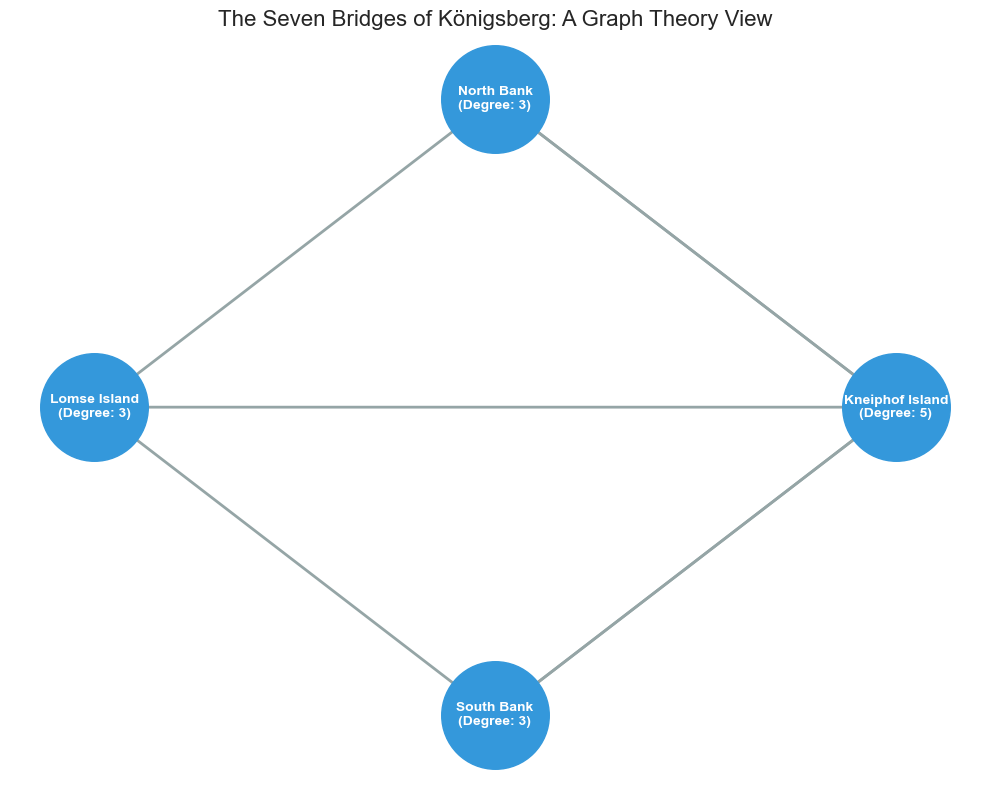

Graph visualisation saved to outputs/01h_konigsberg_bridge/01h_konigsberg_bridge_visualisation.png


In [4]:
# --- Step 3: Visualize the Königsberg Bridge Graph ---
# 203 # This cell creates a visualisation of the graph. A custom layout is defined
# 203 # to approximate the actual geography of the Königsberg bridges. Node labels
# 203 # are enhanced to include their calculated degrees, directly linking the
# 203 # visual representation to the analysis in the previous step.

def visualize_konigsberg_graph(G: nx.MultiGraph, analysis: dict, file_path: Path):
    """Creates and saves a visualisation of the Königsberg graph."""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 8))

    # 203 # Define a layout that approximates the map of Königsberg.
    pos = {"A": (0, 2), "B": (0, 0), "C": (1.5, 1), "D": (-1.5, 1)}

    # 203 # Create labels that include the node's name and its degree.
    labels = {
        node: f"{data['name']}\n(Degree: {analysis['node_degrees'][node]})"
        for node, data in G.nodes(data=True)
    }

    nx.draw(
        G, pos, ax=ax,
        with_labels=True,
        labels=labels,
        node_size=6000,
        node_color="#3498db",
        font_size=10,
        font_weight="bold",
        font_color="white",
        width=2.0,
        edge_color="#95a5a6"
    )

    ax.set_title("The Seven Bridges of Königsberg: A Graph Theory View", fontsize=16)
    plt.tight_layout()
    fig.savefig(file_path, dpi=200)
    plt.show()
    print(f"Graph visualisation saved to {file_path}")

# 203 # Execute the visualisation.
visualize_konigsberg_graph(G_konigsberg, analysis_results, cfg.viz_file)

In [5]:
# --- Step 4: Export Artifacts ---
# 203 # This final cell saves the analysis results to a JSON file. This creates a
# 203 # machine-readable record of the analysis, including the node degrees and the
# 203 # conclusion about the Eulerian path, completing the notebook's workflow.

def export_artifacts(analysis_results: dict, summary_path: Path):
    """Saves the analysis results to a JSON file."""
    with open(summary_path, 'w') as f:
        json.dump(analysis_results, f, indent=2)
    print(f"Analysis summary saved to {summary_path}")


# 203 # Execute the export function.
export_artifacts(analysis_results, cfg.summary_file)

print("\n--- Notebook 01h Complete ---")

Analysis summary saved to outputs/01h_konigsberg_bridge/01h_analysis_summary.json

--- Notebook 01h Complete ---
